In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('IMDB Dataset.csv')

In [3]:
!pip install nltk

In [4]:
# for importing english language stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#Basic EDA PART
df.shape

(50000, 2)

In [6]:
df.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [7]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [11]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [12]:
# for importing label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
#for applying label encoder
df['sentiment'] = le.fit_transform(df['sentiment'])

In [14]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [15]:
# X for input y for output/ prediction
x=df['review']
y=df['sentiment']

In [16]:
x

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [17]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int32

In [18]:
# removing all special and numeric character from the data and also remove stopwords and apply stemming
# for stlyling only
from tqdm import tqdm

In [19]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

In [20]:
ps = PorterStemmer()
corpus = []
for i in tqdm(range(len(x))):
    review = re.sub("[a-zA-Z]" , " ",x[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [10:37<00:00, 78.40it/s]


In [21]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
# for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
# cv = TfidfVectorizer(max_features=500)
x = cv.fit_transform(corpus).toarray()

In [23]:
# input
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
# splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=81)

In [25]:
# svm
from sklearn.svm import SVC
model = SVC(C=1.0, kernel='linear',random_state=81)

In [26]:
# fit
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=81)

In [27]:
model.score(x_test, y_test)

0.5301

In [28]:
# predict
y_pred = model.predict(x_test)

In [29]:
# save and load the model
import pickle

In [30]:
# dump the preprocessing file
pickle.dump(cv, open('movie_review_cv.pkl', 'wb'))
# dump the model
pickle.dump(model, open('movie_review_model.pkl', 'wb'))

In [31]:
save_cv = pickle.load(open('movie_review_cv.pkl', 'rb'))
save_model = pickle.load( open('movie_review_model.pkl', 'rb'))

In [32]:
# function for testing

def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
#     sen = cv.transform([sentence]).toarray()
    res = save_model.predict(sen)[0]
#     res = model.predict(sen)[0]
    #     print(res)
    if res == 1:
        print('positive')
    else:
        print('negative')

In [33]:
sentence = 'i love Gabriel Guevara'
test_model(sentence)

negative


In [34]:
sentence = 'i hate Gigi Hadid'
test_model(sentence)

negative


In [35]:
# print(set(stopwords.words("english")))
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.52      0.62      7427
           1       0.29      0.56      0.38      2573

    accuracy                           0.53     10000
   macro avg       0.53      0.54      0.50     10000
weighted avg       0.65      0.53      0.56     10000



<AxesSubplot:>

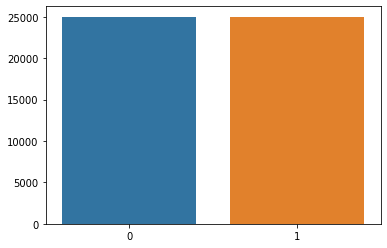

In [36]:
# count the number of occurrences of each value in the target variable
target_counts = df['sentiment'].value_counts()

# plot the distribution of the target variable
sns.barplot(x=target_counts.index, y=target_counts.values)